## Case Study
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 
#### Intent
The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
- Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1086]:
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



# hide warnings
import warnings
warnings.filterwarnings('ignore')



### Load data 

In [1087]:
df = pd.read_csv("C://data//train.csv")

In [1088]:
df.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

### Data Inspection

In [1089]:
df.shape


(1460, 81)

In [1090]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Cleaning

In [1091]:
#Check null percentage
# print(df.isnull().sum())
def check_null(df):
    df_null = df.isnull().sum()
    print(df_null[df_null> 0])
    df_null = round(df_null[df_null> 0]/len(df.index), 9)
    df_null = df_null.sort_values()
    print(df_null)



In [1092]:
nd = check_null(df)
nd

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64


In [1093]:
# Few categorical columns having missing values have business importance like House without Pool has PoolQC as null. Replace those values with a valid category value


df["BsmtQual"].fillna("NoBasement", inplace=True)
df["BsmtCond"].fillna("NoBasement", inplace=True)
df["BsmtFinType1"].fillna("NoBasement", inplace=True)
df["BsmtExposure"].fillna("NoBasement", inplace=True)
df["BsmtFinType2"].fillna("NoBasement", inplace=True)

df["GarageCond"].fillna("NoGarage", inplace=True)
df["GarageQual"].fillna("NoGarage", inplace=True)
df["GarageFinish"].fillna("NoGarage", inplace=True)
df["GarageType"].fillna("NoGarage", inplace=True)

df["FireplaceQu"].fillna("NoFireplace", inplace=True)
df["Fence"].fillna("NoFence", inplace=True)
df["Alley"].fillna("NoAlleyAccess", inplace=True)
df["MiscFeature"].fillna("None", inplace=True)
df["PoolQC"].fillna("NoPool", inplace=True)



In [1094]:
check_null(df)

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64
Electrical     0.000685
MasVnrType     0.005479
MasVnrArea     0.005479
GarageYrBlt    0.055479
LotFrontage    0.177397
dtype: float64


In [1095]:
df.Electrical.mode()

0    SBrkr
Name: Electrical, dtype: object

In [1096]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [1097]:
df['MasVnrType'].fillna("None", inplace=True)

In [1098]:
# Data  Imputation
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [1099]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [1100]:
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [1101]:
df['LotFrontage'] = df["LotFrontage"].transform(lambda x: x.fillna(df['LotFrontage'].median()))
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df['Electrical'].fillna('SBrkr', inplace=True)


In [1102]:
#Identify the record where Basement value is specified where it is not having a basement for remaining basement columns
df1=df[(df.BsmtExposure=='NoBasement')]
df2=df[(df.BsmtFinType1=='NoBasement') & (df.BsmtCond=='NoBasement') & (df.BsmtQual=='NoBasement')]
df1[~df1.isin(df2)].dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949.0,60.0,RL,65.0,14006.0,Pave,NoAlleyAccess,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2002.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NoBasement,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936.0,840.0,0.0,1776.0,0.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,1.0,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144.0,96.0,0.0,0.0,0.0,0.0,NoPool,NoFence,None,0.0,2.0,2006.0,WD,Normal,192500.0


In [1103]:
#Identify the record where Basement value is specified where it is not having a basement for remaining basement columns
df1=df[(df.BsmtFinType2=='NoBasement')]
df2=df[(df.BsmtFinType1=='NoBasement') & (df.BsmtCond=='NoBasement') & (df.BsmtQual=='NoBasement')]
df1[~df1.isin(df2)].dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333.0,20.0,RL,85.0,10655.0,Pave,NoAlleyAccess,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8.0,5.0,2003.0,2004.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,NoBasement,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629.0,0.0,0.0,1629.0,1.0,0.0,2.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Attchd,2003.0,RFn,3.0,880.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NoPool,NoFence,None,0.0,10.0,2009.0,WD,Normal,284000.0


In [1104]:
#deleting the records that are identified above and having bad data
df=df[(df.Id!=333.0) & (df.Id!=949.0)]

In [1105]:
check_null(df)

Series([], dtype: int64)
Series([], dtype: float64)


In [1106]:
df.dropna( inplace=True)
check_null(df)

Series([], dtype: int64)
Series([], dtype: float64)


In [1107]:
# drop id columns as it has no business significance

In [1108]:
df.drop(columns="Id", inplace=True)

In [1109]:
df.shape

(1458, 80)

In [1110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1458 non-null   int64  
 1   MSZoning       1458 non-null   object 
 2   LotFrontage    1458 non-null   float64
 3   LotArea        1458 non-null   int64  
 4   Street         1458 non-null   object 
 5   Alley          1458 non-null   object 
 6   LotShape       1458 non-null   object 
 7   LandContour    1458 non-null   object 
 8   Utilities      1458 non-null   object 
 9   LotConfig      1458 non-null   object 
 10  LandSlope      1458 non-null   object 
 11  Neighborhood   1458 non-null   object 
 12  Condition1     1458 non-null   object 
 13  Condition2     1458 non-null   object 
 14  BldgType       1458 non-null   object 
 15  HouseStyle     1458 non-null   object 
 16  OverallQual    1458 non-null   int64  
 17  OverallCond    1458 non-null   int64  
 18  YearBuil

### EDA

In [1111]:

def histogram(v):
    sns.distplot(v)

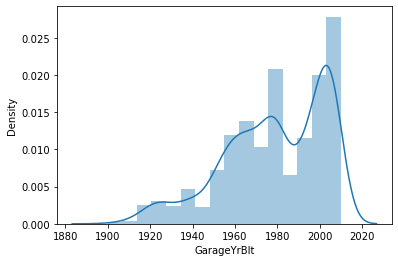

In [1112]:
histogram(df.GarageYrBlt)

In [1113]:
#getting the distribution plot for Garage built year. Based on this we see that 2000+ is the year where mostly built. 
#We can say any house built after 2000 as new built where as other as old

def EncodeGarageType(x):
    if x<2000:
        return 1
    if x>=2000:
        return 2
    if str(x)=='nan':
        return 0
df['GarageYrBlt']=df.GarageYrBlt.apply(EncodeGarageType)

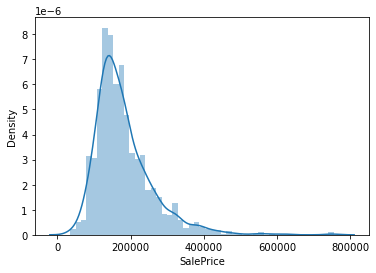

In [1114]:

histogram(df['SalePrice'])

In [1115]:

print("Skewness =  %f" % df['SalePrice'].skew())
print("Kurtosis = %f" % df['SalePrice'].kurt())

Skewness =  1.886364
Kurtosis = 6.551104


#### Observations

In [1116]:
# From the above distribution of saleprice the SalePrice is positively skewed  and to make it normally distributed we need to transform it to log scale
# Since Kurtosis is greater than 3 , SalePrice contains outliers

In [1117]:
def desc(x):
    print(df[x].describe(percentiles=[.1,.25,.5,.75,.90,.95,0.97,0.98,0.99]))

In [1118]:
desc('SalePrice')

count      1458.000000
mean     180842.555556
std       79450.510832
min       34900.000000
10%      106425.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
90%      277650.000000
95%      326300.000000
97%      374290.000000
98%      394946.380000
99%      442692.230000
max      755000.000000
Name: SalePrice, dtype: float64


In [1119]:
# Since saleprice above 95% is highly skewed let's remove those out liers
quantile = df['SalePrice'].quantile(0.95)
df = df[df["SalePrice"] < quantile] 

In [1120]:
desc('SalePrice')

count      1385.000000
mean     168707.525632
std       57401.019394
min       34900.000000
10%      105000.000000
25%      128500.000000
50%      158900.000000
75%      201000.000000
90%      252871.200000
95%      279900.000000
97%      300376.000000
98%      312072.960000
99%      318211.240000
max      326000.000000
Name: SalePrice, dtype: float64


In [1121]:
df.describe(percentiles=[.1,.25,.5,.75,.90,.95,0.97,0.98,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,57.505415,68.909747,10123.553069,5.962455,5.594946,1969.802166,1983.884477,87.873646,413.155235,47.612996,558.819495,1019.587726,1129.631769,332.084477,5.748014,1467.464260,0.406498,0.059206,1.535018,0.367509,2.858484,1.049097,6.403610,0.578339,1.253430,1.709025,456.208664,88.974729,44.487365,22.487365,3.264260,14.651986,2.507581,45.844043,6.318412,2007.812996,168707.525632
std,42.950740,21.500970,8347.718722,1.268233,1.120540,30.008691,20.686685,156.181200,425.951456,162.992058,428.352052,402.673269,357.137395,418.218218,47.527761,476.696087,0.514347,0.242138,0.536629,0.499955,0.807418,0.225956,1.541662,0.631398,0.435132,0.718127,202.956687,120.843178,65.596551,61.612133,28.705316,54.830165,38.482037,509.282260,2.701768,1.326303,57401.019394
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
10%,20.000000,48.000000,4921.200000,4.000000,5.000000,1924.000000,1950.000000,0.000000,0.000000,0.000000,62.200000,630.000000,752.400000,0.000000,0.000000,902.800000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,1.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,105000.000000
25%,20.000000,60.000000,7420.000000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,218.000000,784.000000,866.000000,0.000000,0.000000,1117.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,1.000000,312.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,128500.000000
50%,50.000000,69.000000,9291.000000,6.000000,5.000000,1971.000000,1992.000000,0.000000,365.000000,0.000000,476.000000,970.000000,1065.000000,0.000000,0.000000,1431.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1.000000,2.000000,467.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,158900.000000
75%,70.000000,77.000000,11275.000000,7.000000,6.000000,1999.000000,2003.000000,137.000000,680.000000,0.000000,806.000000,1247.000000,1344.000000,717.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,2.000000,572.000000,165.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,201000.000000
90%,120.000000,90.000000,13962.800000,8.000000,7.000000,2005.000000,2006.000000,297.600000,988.000000,124.200000,1192.800000,1528.000000,1620.600000,911.200000,0.000000,2060.000000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,8.000000,1.000000,2.000000,2.000000,684.600000,250.000000,126.800000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,252871.200000
95%,160.000000,100.000000,16728.000000,8.000000,8.000000,2006.000000,2007.000000,395.000000,1177.000000,399.200000,1423.600000,1659.400000,1720.800000,1096.80000

In [1122]:
#Looks like Lot aread has high skew between 99th and 100th percentile lets remove it
quantile = df['LotArea'].quantile(0.99)
df = df[df["LotArea"] < quantile] 

In [1123]:
#Again there is a very high skew between 99th and 100 percentile lets remove those rows
quantile = df['MiscVal'].quantile(0.99)
df = df[df["MiscVal"] < quantile] 

In [1124]:
#agasin MasVnrArea is nearly 3 time between 99th and 100th percentile lets remove those rows
quantile = df['MasVnrArea'].quantile(0.99)
df = df[df["MasVnrArea"] < quantile]

In [1125]:
#Again BsmtFinSF2 is twice beween 99th and 100 percentile lets remove it
quantile = df['BsmtFinSF2'].quantile(0.99)
df = df[df["BsmtFinSF2"] < quantile]

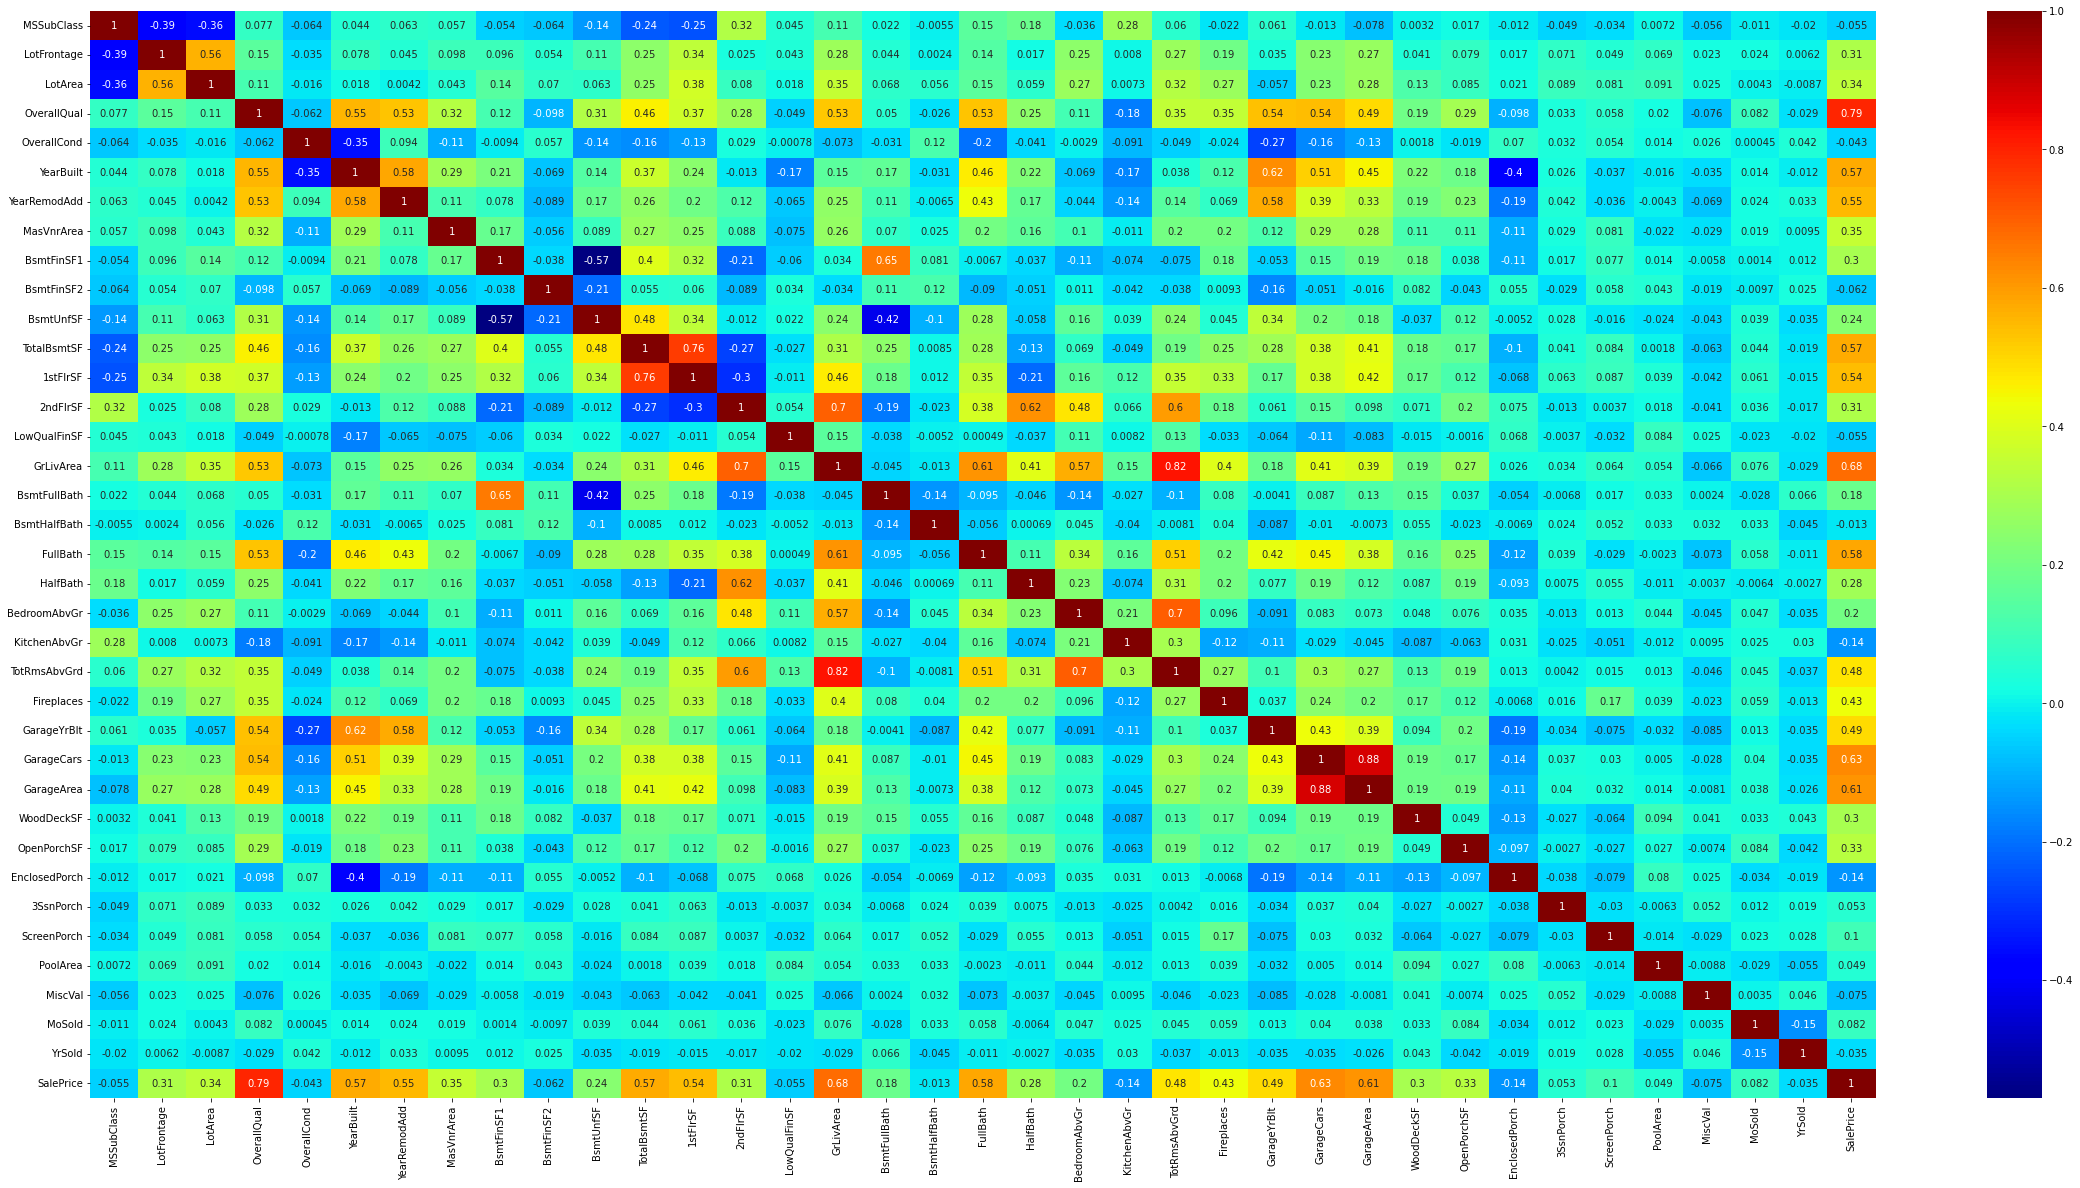

In [1126]:
plt.figure(figsize = (40, 20))
sns.heatmap(df.corr(), annot=True, cmap="jet")
plt.show()

In [1127]:
#there is 88% correlation between GarageCars and GarageArea so dropping cars
df.drop(columns="GarageCars", inplace=True)

#there is 76% corelation between TotalBsmtSF and 1stFlrSF dropping one
df.drop(columns="TotalBsmtSF", inplace=True)

#there is 83% corelation between TotRmsAbvGrd  and GrLivArea  dropping one
df.drop(columns="TotRmsAbvGrd", inplace=True)

In [1128]:
data_types = df.dtypes
numeric_cols = list(data_types[(data_types == 'int64') | (data_types == float)].index)
categorical_cols = list(data_types[data_types == object].index)
print(len(numeric_cols))
print(len(categorical_cols))

34
43


#### Observations
There are few variables like OverallQual, YearBuilt , YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, GarageCars, GarageArea and MoSold are highly positvely correlated to SalePrice.


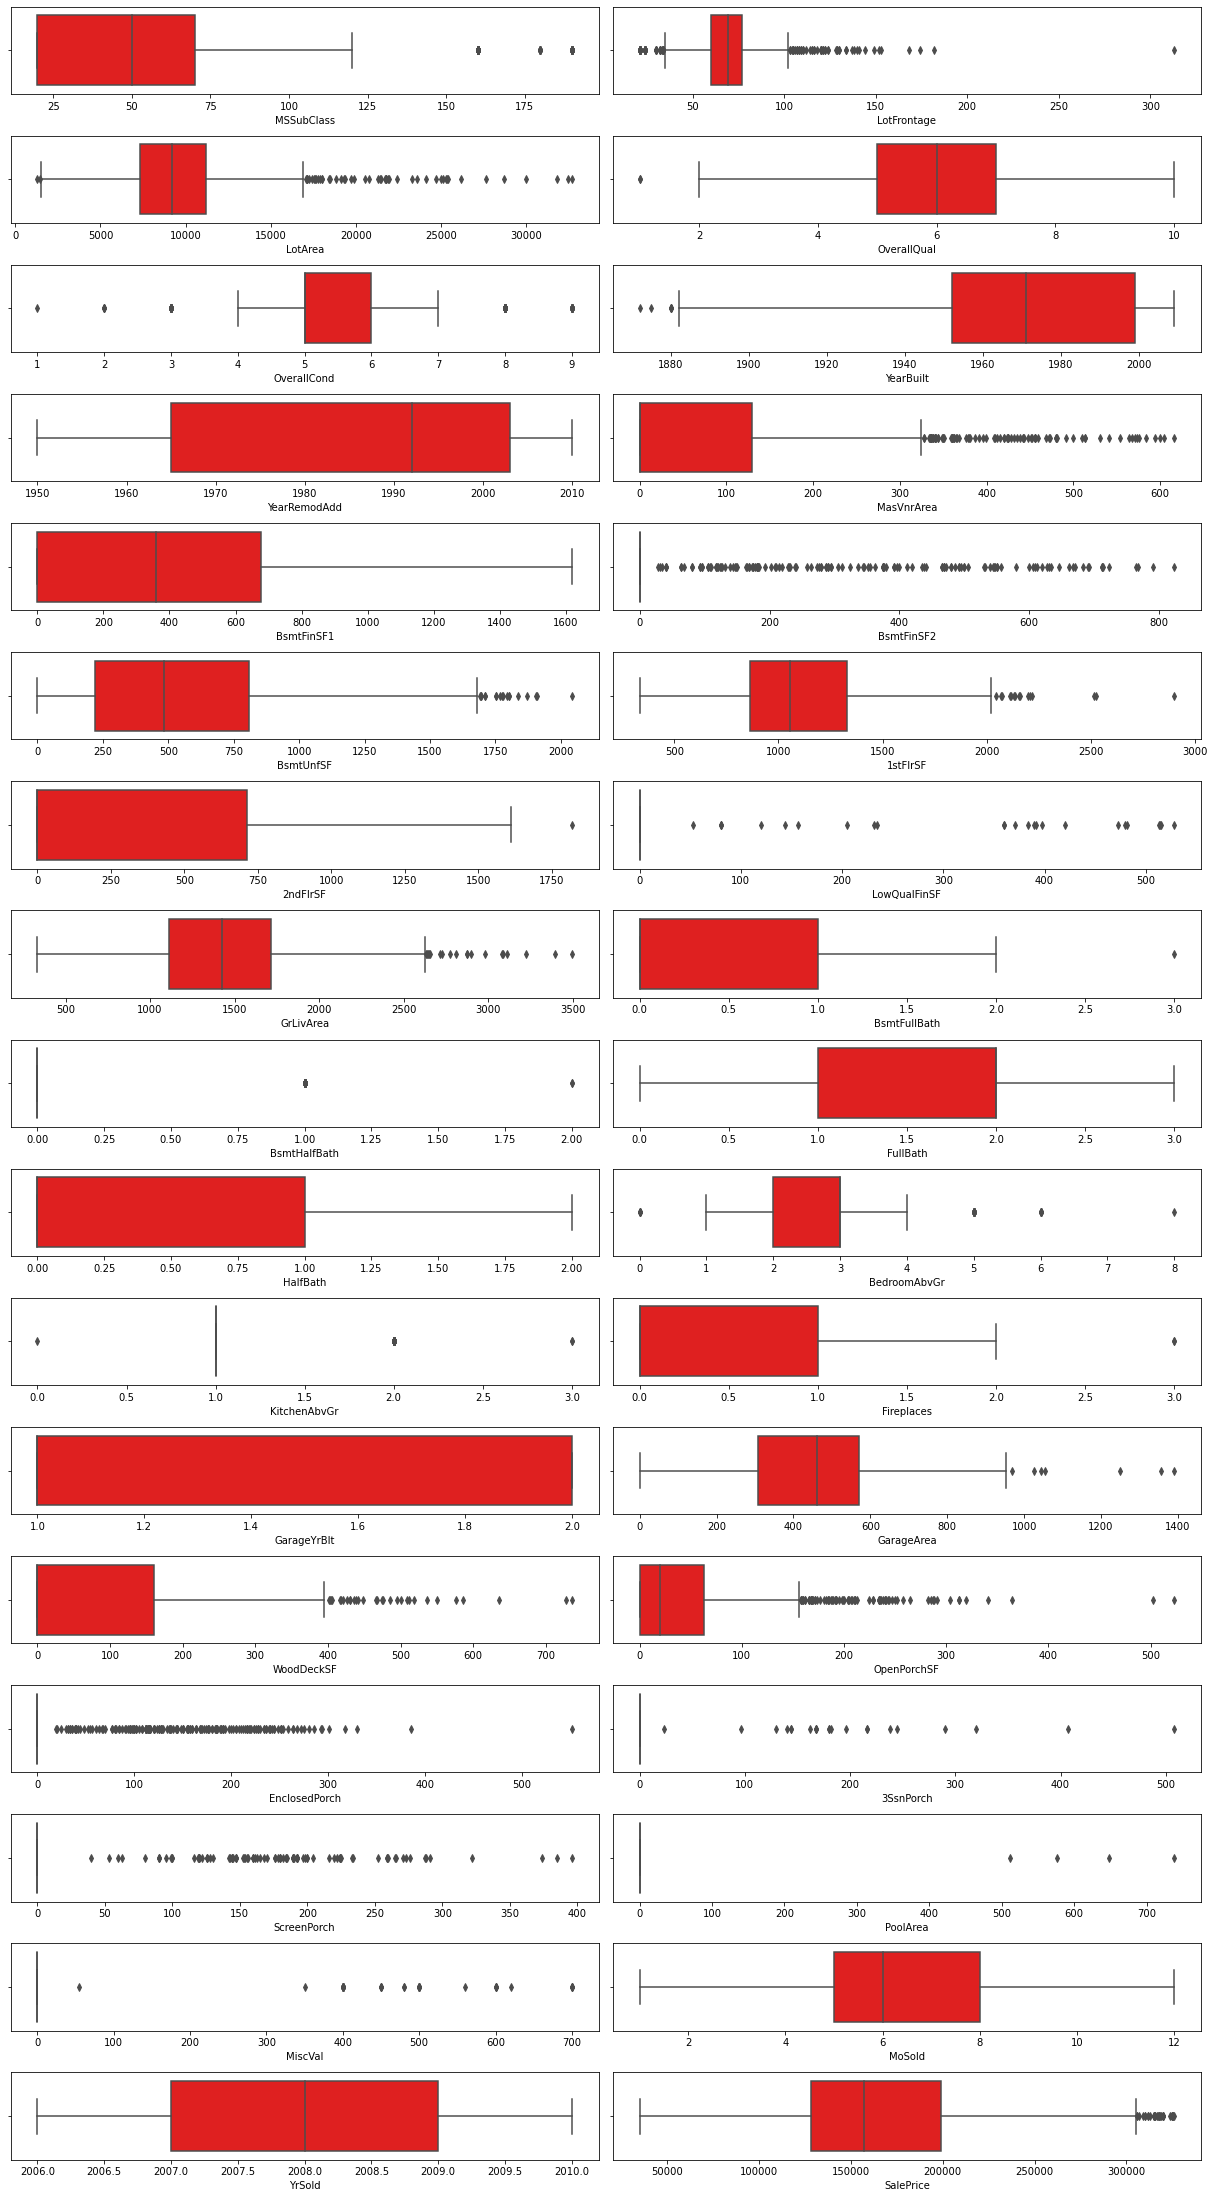

In [1129]:
# 'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt'
#Lets plot the box plot to see the values
#set the number of columns to 2
numcol=2
#get the number of rows to plot
rows=len(numeric_cols)//numcol+1
#set the fig size
plt.figure(figsize=(17,32))
#for each numeric column plot
for index,column in enumerate(numeric_cols):
    #choose the plot
    plt.subplot(rows,numcol,index+1)
    #plot the box plot
    sns.boxplot(x=column, data=df, color='red')
plt.tight_layout()   
plt.show()  


#### Observations
We can see that data is nearly good but it is likely that we have some outliers. We cannot remove these as it will cause signifincat data loss

<Figure size 720x1080 with 0 Axes>

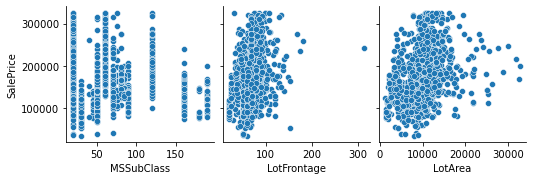

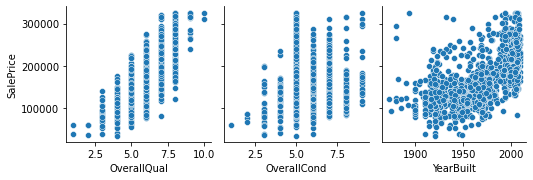

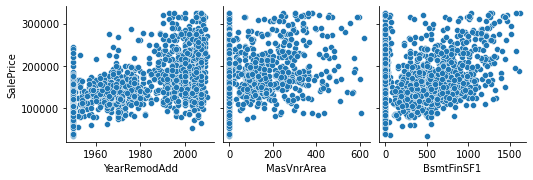

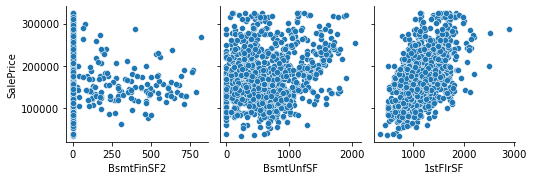

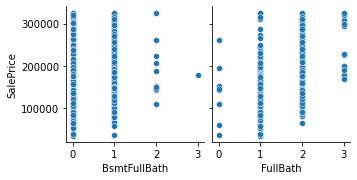

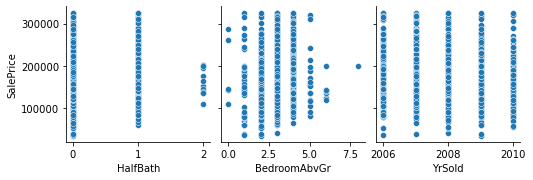

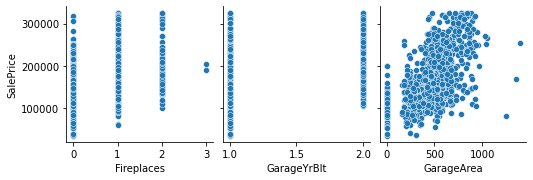

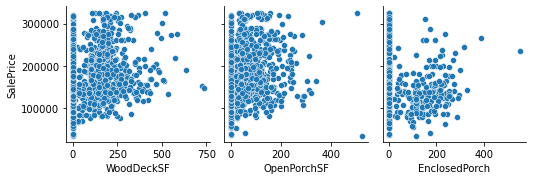

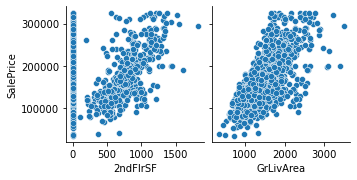

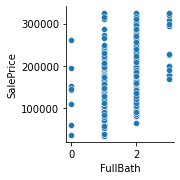

In [1130]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,15))
sns.pairplot(df, x_vars=['MSSubClass', 'LotFrontage', 'LotArea'], y_vars='SalePrice',kind='scatter',diag_kind=None)
sns.pairplot(df, x_vars=['OverallQual', 'OverallCond', 'YearBuilt'], y_vars='SalePrice',kind='scatter',diag_kind=None)
sns.pairplot(df, x_vars=['YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1'], y_vars='SalePrice',kind='scatter',diag_kind=None)
sns.pairplot(df, x_vars=['BsmtFinSF2','BsmtUnfSF', '1stFlrSF'], y_vars='SalePrice',kind='scatter',diag_kind=None)
sns.pairplot(df, x_vars=['BsmtFullBath', 'FullBath'], y_vars='SalePrice',kind='scatter',diag_kind=None)
sns.pairplot(df, x_vars=['HalfBath', 'BedroomAbvGr', 'YrSold'], y_vars='SalePrice',kind='scatter',diag_kind=None)
sns.pairplot(df, x_vars=['Fireplaces', 'GarageYrBlt', 'GarageArea'], y_vars='SalePrice',kind='scatter',diag_kind=None)
sns.pairplot(df, x_vars=['WoodDeckSF','OpenPorchSF', 'EnclosedPorch'], y_vars='SalePrice',kind='scatter',diag_kind=None)
sns.pairplot(df, x_vars=['2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',kind='scatter',diag_kind=None)
sns.pairplot(df, x_vars=[ 'FullBath'], y_vars='SalePrice',kind='scatter',diag_kind=None)

plt.show()

#### Observations
based on below plots we see some trend or linear pattern observed between SalesPrice and LotArea,YearBuilt, YearRemodAdd, BsmtFinSF1, 1stFlrSF, GarageArea, 2ndFlrSF,  GrLivArea, TotalBsmtSF

###  Data Preparation


In [1131]:
#### As we see earlier as part of EDA the SalePrice is not normally distributed and positively skewed let's transform the saleprice to log scale

In [1132]:
df["TransformedPrice"] = np.log(df["SalePrice"])

<AxesSubplot:xlabel='TransformedPrice', ylabel='Density'>

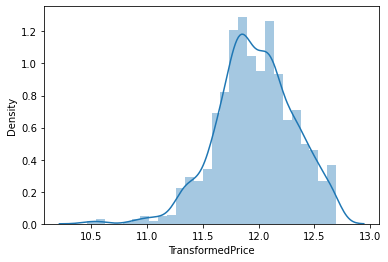

In [1133]:
sns.distplot(df["TransformedPrice"])

In [1134]:
#creating dummy columns for all string type categorical columsn
columns=df.select_dtypes(include=['object']).columns
for column in columns:
    df_d = pd.get_dummies(df[column], prefix=column, drop_first = True)
    df = pd.concat([df, df_d], axis = 1)
    df.drop(columns=[column],axis=1, inplace=True)
    

In [1135]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TransformedPrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlleyAccess,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,...,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NoPool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,854,0,1710,1,0,2,1,3,1,0,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,0,0,1262,0,1,2,0,3,1,1,1,460,298,0,0,0,0,0,0,5,2007,181500,12.109011,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,866,0,1786,1,0,2,1,3,1,1,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,961,756,0,1717,1,0,1,0,3,1,1,1,642,0,35,272,0,0,0,0,2,2006,140000,11.849398,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1053,0,2198,1,0,2,1,4,1,1,2,836,192,84,0,0,0,0,0,12,2008,250000,12.429216,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [1136]:
df = df.drop(["SalePrice"], axis=1)

In [1137]:
df.shape

(1329, 251)

In [1138]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 


In [1139]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1140]:

scaler = MinMaxScaler()

In [1141]:
#applying scaling on training set
num_vars = df_train.select_dtypes(include=np.number).columns
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TransformedPrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlleyAccess,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,...,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NoPool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
464,0.000000,0.133562,0.222917,0.500,0.500,0.773723,0.466667,0.220779,0.391608,0.000000,0.222339,0.231596,0.000000,0.0,0.185861,0.0,0.0,0.666667,0.0,0.375,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.636364,0.75,0.565117,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1022,0.176471,0.106164,0.255266,0.500,0.500,0.423358,0.000000,0.000000,0.205976,0.000000,0.308338,0.178660,0.184818,0.0,0.254895,0.0,0.0,0.333333,0.0,0.250,0.0,0.000000,0.0,0.117994,0.000000,0.000000,0.347826,0.0,0.0,0.0,0.000000,0.181818,0.25,0.405683,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
765,0.000000,0.184932,0.420314,1.000,0.500,0.992701,0.966667,0.461039,0.000000,0.000000,0.785527,0.424318,0.000000,0.0,0.340524,0.0,0.0,0.666667,0.0,0.250,0.0,0.333333,1.0,0.436578,0.000000,0.510264,0.000000,0.0,0.0,0.0,0.000000,0.636364,0.50,0.905319,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
953,0.235294,0.164384,0.307717,0.500,0.375,0.708029,0.316667,0.376623,0.357279,0.243995,0.015207,0.284533,0.440044,0.0,0.493860,0.0,0.5,0.666667,0.5,0.500,0.0,0.333333,0.0,0.390855,0.414402,0.554252,0.000000,0.0,0.0,0.0,0.571429,0.727273,0.50,0.712331,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
840,0.294118,0.164384,0.342342,0.625,0.875,0.386861,0.000000,0.000000,0.099174,0.000000,0.270582,0.136476,0.369637,0.0,0.332559,0.0,0.0,0.666667,0.0,0.500,0.0,0.000000,0.0,0.294985,0.000000,0.000000,0.460145,0.0,0.0,0.0,0.000000,0.181818,0.50,0.619718,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [1142]:
#applying the scaling learnt on Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TransformedPrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlleyAccess,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,...,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NoPool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1203,0.000000,0.184932,0.265237,0.75,0.500,0.934307,0.850000,0.277597,0.000000,0.000000,0.854746,0.475600,0.000000,0.0,0.381679,0.000000,0.0,0.666667,0.0,0.375,0.0,0.333333,1.0,0.332596,0.100543,0.686217,0.0,0.0,0.0,0.0,0.000000,0.818182,0.75,0.808519,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
499,0.000000,0.167808,0.194223,0.50,0.750,0.627737,0.583333,0.000000,0.070566,0.352718,0.273728,0.178660,0.000000,0.0,0.143379,0.000000,0.5,0.333333,0.0,0.250,0.0,0.000000,0.0,0.219027,0.016304,0.835777,0.0,0.0,0.0,0.0,0.685714,0.454545,0.25,0.550365,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1409,0.235294,0.085616,0.611298,0.75,0.625,0.832117,0.683333,0.199675,0.000000,0.000000,0.414788,0.312655,0.471397,0.0,0.535347,0.000000,0.0,0.666667,0.5,0.375,0.0,0.333333,0.0,0.399705,0.494565,0.184751,0.0,0.0,0.0,0.0,0.000000,0.909091,0.50,0.812724,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1394,0.588235,0.109589,0.082331,0.75,0.500,0.978102,0.933333,0.073052,0.680229,0.000000,0.149974,0.421836,0.000000,0.0,0.338533,0.333333,0.0,0.666667,0.0,0.250,0.0,0.333333,1.0,0.477876,0.218750,0.058651,0.0,0.0,0.0,0.0,0.000000,0.818182,0.00,0.874379,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
576,0.176471,0.106164,0.154371,0.75,0.750,0.408759,0.000000,0.000000,0.000000,0.000000,0.451494,0.164185,0.330033,0.0,0.330899,0.000000,0.5,0.666667,0.0,0.375,0.0,0.333333,0.0,0.159292,0.000000,0.146628,0.0,0.0,0.0,0.0,0.000000,0.636364,0.75,0.635505,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [1143]:
#generating X and Y sets for training and testing
y_train = df_train.pop('TransformedPrice')
X_train = df_train

y_test = df_test.pop('TransformedPrice')
X_test = df_test

## Model Building

In [1144]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [1145]:
# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [1146]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1147]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.030804,0.001875,0.002184,0.001817,0.0001,{'alpha': 0.0001},-0.037416,-0.032490,-0.038378,-0.033792,-0.039909,-0.036397,0.002805,1,-0.027948,-0.028655,-0.027215,-0.028480,-0.026933,-0.027846,0.000678
1,0.011979,0.004744,0.002028,0.001121,0.001,{'alpha': 0.001},-0.041053,-0.037864,-0.044338,-0.037425,-0.040291,-0.040194,0.002491,2,-0.036943,-0.037863,-0.036490,-0.038283,-0.037027,-0.037321,0.000654
2,0.006060,0.006531,0.003701,0.006017,0.01,{'alpha': 0.01},-0.077832,-0.071538,-0.077342,-0.075631,-0.077232,-0.075915,0.002310,3,-0.074373,-0.075280,-0.074401,-0.075638,-0.074307,-0.074800,0.000551
3,0.005776,0.005873,0.003703,0.006453,0.05,{'alpha': 0.05},-0.121812,-0.119664,-0.121712,-0.117814,-0.121339,-0.120468,0.001537,4,-0.120121,-0.120644,-0.120149,-0.121124,-0.120253,-0.120458,0.000382
4,0.009386,0.007684,0.003103,0.006205,0.1,{'alpha': 0.1},-0.121812,-0.119664,-0.121712,-0.117814,-0.121339,-0.120468,0.001537,4,-0.120121,-0.120644,-0.120149,-0.121124,-0.120253,-0.120458,0.000382
5,0.003014,0.006028,0.000000,0.000000,0.2,{'alpha': 0.2},-0.121812,-0.119664,-0.121712,-0.117814,-0.121339,-0.120468,0.001537,4,-0.120121,-0.120644,-0.120149,-0.121124,-0.120253,-0.120458,0.000382
6,0.010036,0.005062,0.001400,0.001200,0.3,{'alpha': 0.3},-0.121812,-0.119664,-0.121712,-0.117814,-0.121339,-0.120468,0.001537,4,-0.120121,-0.120644,-0.120149,-0.121124,-0.120253,-0.120458,0.000382
7,0.003587,0.005538,0.003128,0.006257,0.4,{'alpha': 0.4},-0.121812,-0.119664,-0.121712,-0.117814,-0.121339,-0.120468,0.001537,4,-0.120121,-0.120644,-0.120149,-0.121124,-0.120253,-0.120458,0.000382
8,0.009153,0.007508,0.001002,0.002003,0.5,{'alpha': 0.5},-0.121812,-0.119664,-0.121712,-0.117814,-0.121339,-0.120468,0.001537,4,-0.120121,-0.120644,-0.120149,-0.121124,-0.120253,-0.120458,0.000382
9,0.005343,0.006699,0.003002,0.006003,0.6,{'alpha': 0.6},-0.121812,-0.119664,-0.121712,-0.117814,-0.121339,-0.120468,0.001537,4,-0.120121,-0.120644,-0.120149,-0.121124,-0.120253,-0.120458,0.000382


In [1148]:
# Based on grid search best hyper parameters is 0.0001
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
-0.03639728188663125


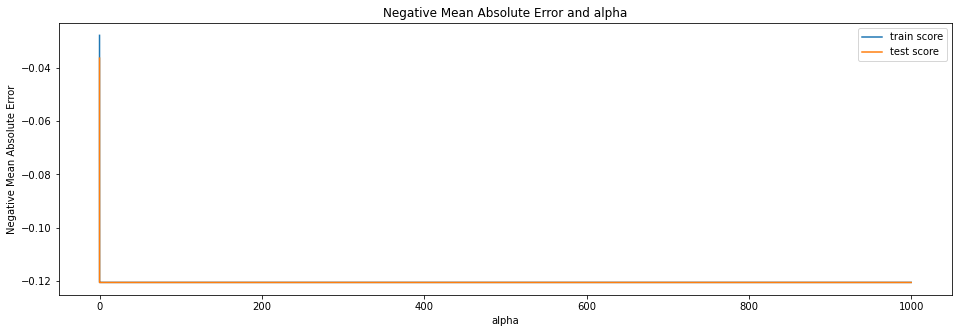

In [1149]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1150]:
#taking alpha of 0.0001 and retraining model
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [1151]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values('Coefficient', ascending=False).head(10).head(10)

,Features,Coefficient
12,GrLivArea,0.3537
4,OverallCond,0.1412
3,OverallQual,0.1377
7,BsmtFinSF1,0.1003
5,YearBuilt,0.0874
20,GarageArea,0.0811
9,BsmtUnfSF,0.0807
2,LotArea,0.0600
28,MSZoning_RL,0.0546
42,Neighborhood_Crawfor,0.0504


In [1152]:
#getting the r2 value for lasso regression. It has score of 92.7% which is good
y_train_pred = lasso.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.927183179766154

Text(0, 0.5, 'y_pred')

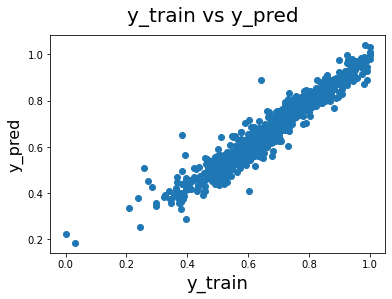

In [1153]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

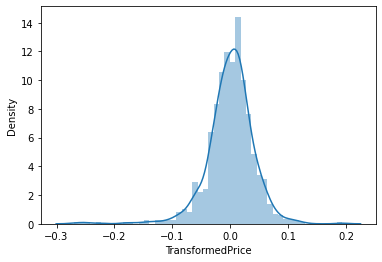

In [1154]:
#plot the residuals. Based on plots the error are normally distributed
res=y_train-y_train_pred
sns.distplot(res)
plt.show()

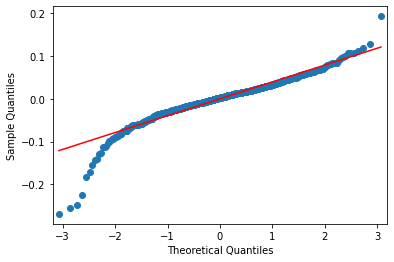

In [1155]:
import statsmodels.api as sm

#plot the residuals
res=y_train-y_train_pred
sm.qqplot(res, line ='r')
plt.show()

In [1156]:
#r2 score on test data
y_test_pred=lasso.predict(X_test)
r2_score(y_test,y_test_pred)

0.8899103815636052

In [1157]:
# Check the mean squared error

mean_squared_error(y_test, y_test_pred)

0.0030735720226015275

In [1158]:
# Put the Features and coefficienst in a dataframe
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(6)})
lasso_df.reset_index(drop=True, inplace=True)

In [1159]:
lasso_df.sort_values('Coefficient', ascending=False).head(10)

,Features,Coefficient
14,GrLivArea,0.353744
4,OverallCond,0.141184
3,OverallQual,0.137697
8,BsmtFinSF1,0.100313
5,YearBuilt,0.087424
23,GarageArea,0.081067
10,BsmtUnfSF,0.080736
2,LotArea,0.059988
35,MSZoning_RL,0.054618
58,Neighborhood_Crawfor,0.050446


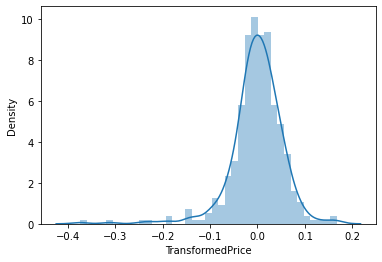

In [1160]:
#plot the residuals. Plot appears that residuals are normally distributed
res=y_test-y_test_pred
sns.distplot(res)
plt.show()

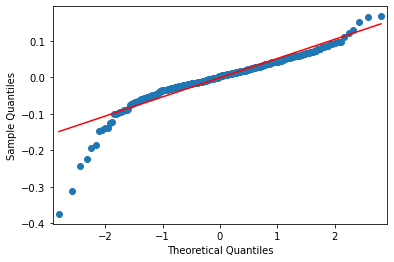

In [1161]:
res=y_test-y_test_pred
sm.qqplot(res, line ='r')
plt.show()

### Applying Ridge Linear Regression

In [1162]:
# Applying Ridge

ridge = Ridge()

# cross validation
folds = 5
#use the grid search to get the lambda value
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1163]:

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007514,0.002330,0.002287,0.000420,0.0001,{'alpha': 0.0001},-0.045485,-0.038733,-0.043442,-0.040808,-0.047744,-0.043242,0.003212,24,-0.024902,-0.026070,-0.024676,-0.025669,-0.024097,-0.025083,0.000705
1,0.006194,0.001016,0.001797,0.000398,0.001,{'alpha': 0.001},-0.045464,-0.038721,-0.043424,-0.040793,-0.047674,-0.043215,0.003195,23,-0.024903,-0.026071,-0.024678,-0.025671,-0.024099,-0.025084,0.000705
2,0.006112,0.000672,0.002404,0.000489,0.01,{'alpha': 0.01},-0.045255,-0.038604,-0.043273,-0.040650,-0.047086,-0.042974,0.003056,22,-0.024911,-0.026081,-0.024691,-0.025685,-0.024130,-0.025100,0.000700
3,0.006559,0.000917,0.002656,0.000543,0.05,{'alpha': 0.05},-0.044459,-0.038151,-0.042843,-0.040085,-0.045629,-0.042233,0.002762,21,-0.024978,-0.026135,-0.024765,-0.025751,-0.024312,-0.025188,0.000664
4,0.006615,0.000501,0.002194,0.000403,0.1,{'alpha': 0.1},-0.043648,-0.037684,-0.042486,-0.039482,-0.044703,-0.041601,0.002624,19,-0.025098,-0.026217,-0.024847,-0.025832,-0.024496,-0.025298,0.000635


In [1164]:
#getting the best alpha value
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 3.0}
-0.037588006612337965


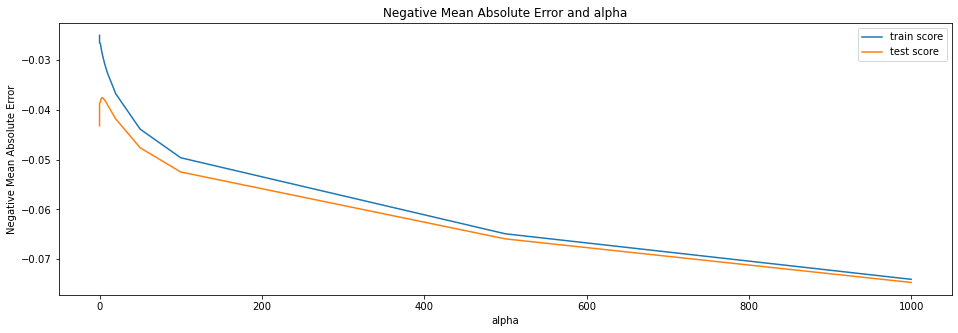

In [1165]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1166]:
#use alpha of 3.0
alpha = 3.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#get the coefficients
ridge.coef_

array([-1.64880124e-02,  2.70755123e-02,  5.91665582e-02,  1.13296823e-01,
        1.03395118e-01,  4.45898053e-02,  2.28603074e-02, -3.26826126e-03,
        8.46386943e-02,  2.49494528e-02,  7.28852406e-02,  1.18749663e-01,
        7.71265090e-02, -2.04003798e-03,  1.41487574e-01,  2.74553121e-02,
       -6.83698890e-03,  4.25339478e-02,  2.57509730e-02,  1.69310207e-02,
       -1.08149755e-02,  2.65071487e-02,  1.76658905e-02,  7.35616246e-02,
        2.62444504e-02,  2.92914792e-02,  1.66959196e-02,  7.63111518e-03,
        4.31111959e-02, -7.76634970e-04,  1.13929224e-02,  2.00402592e-03,
       -1.14009194e-02,  3.62535028e-02,  3.28771170e-02,  4.63305682e-02,
        3.23882138e-02,  3.52699666e-02, -1.93024867e-02, -3.80548358e-03,
        1.81816128e-02,  4.52151408e-03,  7.11199733e-04,  9.98270948e-04,
       -7.68011515e-03,  3.44942997e-03, -1.11273561e-02,  6.51654356e-03,
       -1.22619828e-02, -1.04098381e-02, -6.87783256e-03,  1.23363736e-02,
       -1.62768914e-02,  

In [1167]:
#getting the R2 score for training data. It seems that Ridge is gicving 92.6 R2 score on train set
y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.926996578389455

In [1168]:
#getting the R2 score for training data. It seems that Ridge is gicving 88.1 R2 score on test
y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.885411124694643

In [1169]:
# Check the mean squared error

mean_squared_error(y_test, y_test_pred)

0.003199185956334343

In [1170]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(6)})
ridge_df.reset_index(drop=True, inplace=True)

In [1171]:
ridge_df.sort_values('Coefficient', ascending=False).head(10)

,Features,Coefficient
14,GrLivArea,0.141488
11,1stFlrSF,0.118750
3,OverallQual,0.113297
4,OverallCond,0.103395
8,BsmtFinSF1,0.084639
12,2ndFlrSF,0.077127
23,GarageArea,0.073562
10,BsmtUnfSF,0.072885
2,LotArea,0.059167
35,MSZoning_RL,0.046331


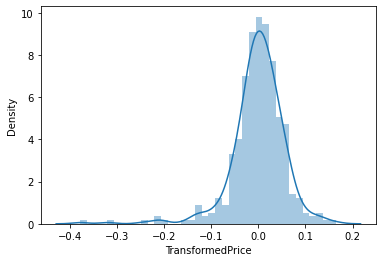

In [1172]:
#plot the residuals
res=y_test-y_test_pred
sns.distplot(res)
plt.show()

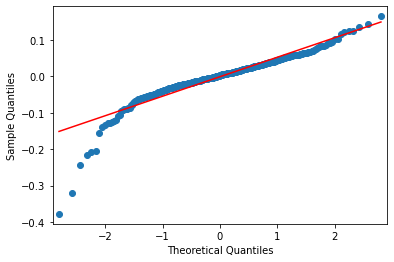

In [1173]:
#plot the residuals
import statsmodels.api as sm
res=y_test-y_test_pred
sm.qqplot(res, line ='r')
plt.show()

## Conclusion

Based on 2 models that we have prediced Lasso seems to provide better accuracy.
Below are few conclusions of model
- lasso works best with alpha of 0.0001
- ridge works best with alpha of 3.0
- Lasso got higest r2 of 92.7 followed by ridge
- Based on Lasso following are the 10 key columns that influence the price of property

    GrLivArea	
    OverallCond	
    OverallQual	
    BsmtFinSF1	
    YearBuilt	
    GarageArea	
    BsmtUnfSF	
    LotArea
    MSZoning_RL	
    Neighborhood_Crawfor	
    
    
    
    

### Questions

In [1174]:
#use alpha of 3.0
alpha = 3.0*2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#get the coefficients
ridge.coef_

#getting the R2 score for training data. It seems that Ridge is gicving 91.9 R2 score on train set
y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9190614239696848

In [1175]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(6)})
ridge_df.reset_index(drop=True, inplace=True)

In [1176]:
x = ridge_df.sort_values('Coefficient', ascending=False).head(10)
x

,Features,Coefficient
14,GrLivArea,0.123064
11,1stFlrSF,0.104472
3,OverallQual,0.102590
4,OverallCond,0.083918
8,BsmtFinSF1,0.073984
23,GarageArea,0.067338
12,2ndFlrSF,0.065108
10,BsmtUnfSF,0.062907
2,LotArea,0.052984
17,FullBath,0.044896


In [1177]:

# Features	Coefficient
# 14	GrLivArea	0.141488
# 11	1stFlrSF	0.118750
# 3	OverallQual	0.113297
# 4	OverallCond	0.103395
# 8	BsmtFinSF1	0.084639
# 12	2ndFlrSF	0.077127
# 23	GarageArea	0.073562
# 10	BsmtUnfSF	0.072885
# 2	LotArea	0.059167
# 35	MSZoning_RL	0.046331

In [1178]:
x.Features

14      GrLivArea
11       1stFlrSF
3     OverallQual
4     OverallCond
8      BsmtFinSF1
23     GarageArea
12       2ndFlrSF
10      BsmtUnfSF
2         LotArea
17       FullBath
Name: Features, dtype: object

In [1179]:
alpha = 0.0001 * 2
lasso = Lasso(alpha=alpha)     
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [1180]:
y_train_pred = lasso.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9178523439123412

In [1181]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(6)})
lasso_df.reset_index(drop=True, inplace=True)
lx = lasso_df.sort_values('Coefficient', ascending=False).head(10)
lx

,Features,Coefficient
14,GrLivArea,0.358338
3,OverallQual,0.157406
4,OverallCond,0.137473
8,BsmtFinSF1,0.093327
23,GarageArea,0.080763
5,YearBuilt,0.076564
10,BsmtUnfSF,0.066208
2,LotArea,0.052473
58,Neighborhood_Crawfor,0.042529
249,SaleCondition_Partial,0.042502


In [1182]:
lx.Features

14                 GrLivArea
3                OverallQual
4                OverallCond
8                 BsmtFinSF1
23                GarageArea
5                  YearBuilt
10                 BsmtUnfSF
2                    LotArea
58      Neighborhood_Crawfor
249    SaleCondition_Partial
Name: Features, dtype: object

In [1183]:
len(lasso_df[lasso_df.Coefficient>0])

59

In [1184]:
len(ridge_df[ridge_df.Coefficient>0])

131

In [1185]:

X_train.drop(columns=['GrLivArea','OverallQual','OverallCond','BsmtFinSF1','YearBuilt'], inplace=True)

# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1186]:
# Based on grid search best hyper parameters is 0.0001
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
-0.040880013197229656


In [1187]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)     
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [1188]:
y_train_pred = lasso.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9127263541693029

In [1189]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(6)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values('Coefficient', ascending=False).head(10)

,Features,Coefficient
7,1stFlrSF,0.371887
8,2ndFlrSF,0.208674
18,GarageArea,0.102905
30,MSZoning_RL,0.074629
28,MSZoning_FV,0.065458
31,MSZoning_RM,0.065379
196,Functional_Typ,0.060226
29,MSZoning_RH,0.059533
53,Neighborhood_Crawfor,0.056687
69,Neighborhood_StoneBr,0.056308


In [1190]:
# 14	GrLivArea	0.353744
# 4	OverallCond	0.141184
# 3	OverallQual	0.137697
# 8	BsmtFinSF1	0.100313
# 5	YearBuilt	0.087424
# 23	GarageArea	0.081067
# 10	BsmtUnfSF	0.080736
# 2	LotArea	0.059988
# 35	MSZoning_RL	0.054618
# 58	Neighborhood_Crawfor	0.050446